# Google Play Store Project

data from: https://www.kaggle.com/lava18/google-play-store-apps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
play = pd.read_csv(r"C:\Users\georg\DataPython\googleplaystore.csv")

In [3]:
play.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
play.shape

(10841, 13)

In [5]:
play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Cleaning the data

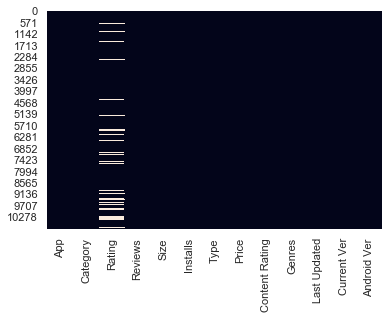

In [6]:
sns.heatmap(play.isnull(), cbar = False)  #Checking missing entries

In [7]:
play.info() # Missing ratings cannot be filled and there are too many missing entries to compensate a value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
play.dropna(axis = 0, inplace = True)

In [9]:
play = play.reset_index()

In [10]:
play.drop(columns = "index", inplace = True)

In [11]:
play

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [12]:
play["Category"].value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [13]:
play["Category"] = play["Category"].str.lower()
play["Category"] = play["Category"].str.capitalize()
play["Category"] = play["Category"].str.replace("_", " ")

In [14]:
play["Category"].value_counts()

Family                 1746
Game                   1097
Tools                   733
Productivity            351
Medical                 350
Communication           328
Finance                 323
Sports                  319
Photography             317
Lifestyle               314
Personalization         312
Business                303
Health and fitness      297
Social                  259
Shopping                238
News and magazines      233
Travel and local        226
Dating                  195
Books and reference     178
Video players           160
Education               155
Entertainment           149
Maps and navigation     124
Food and drink          109
House and home           76
Weather                  75
Auto and vehicles        73
Libraries and demo       64
Art and design           61
Comics                   58
Parenting                50
Events                   45
Beauty                   42
Name: Category, dtype: int64

In [15]:
play["Rating"].value_counts()   # Checking to see that values arent faulty.

4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [16]:
play["Reviews"] = play["Reviews"].astype(int)

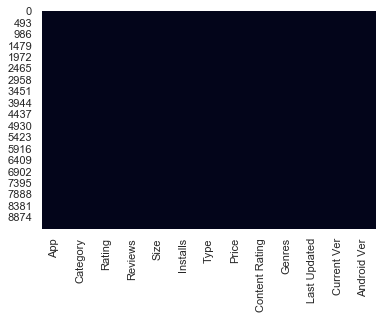

In [17]:
sns.heatmap(play.isnull(), cbar = False)

In [18]:
play.dropna(axis = 0, inplace = True)

In [19]:
play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int32  
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), int32(1), object(11)
memory usage: 987.2+ KB


In [20]:
play.head(40)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,Art and design,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art and design,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art and design,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art and design,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,Art and design,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,Art and design,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,Art and design,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,Art and design,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,Art and design,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [21]:
play["Installs"] = play["Installs"].str.replace(",", "")
play["Installs"] = play["Installs"].str.replace("+", "")
play["Installs"] = play["Installs"].astype(int)

In [22]:
play.rename(columns = {"Installs": "Installs (Value +)"}, inplace = True)

In [23]:
play["Type"].value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

In [24]:
play["Price"].value_counts()

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
         ... 
$1.29       1
$4.84       1
$8.49       1
$1.59       1
$2.56       1
Name: Price, Length: 73, dtype: int64

In [25]:
play["Price"] = play["Price"].str.replace("$", "")
play["Price"] = play["Price"].astype(float)

In [26]:
play.rename(columns = {"Price": "Price ($)"}, inplace = True)

In [27]:
play["Content Rating"].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [28]:
play.drop(columns = ["Size", "Last Updated", "Current Ver", "Android Ver", "Genres"], inplace = True)

In [29]:
play.set_index("App", inplace = True)

In [30]:
play.head()

,Category,Rating,Reviews,Installs (Value +),Type,Price ($),Content Rating
App,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.1,159,10000,Free,0.0,Everyone
Coloring book moana,Art and design,3.9,967,500000,Free,0.0,Everyone
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",Art and design,4.7,87510,5000000,Free,0.0,Everyone
Sketch - Draw & Paint,Art and design,4.5,215644,50000000,Free,0.0,Teen
Pixel Draw - Number Art Coloring Book,Art and design,4.3,967,100000,Free,0.0,Everyone


### Visualising the data

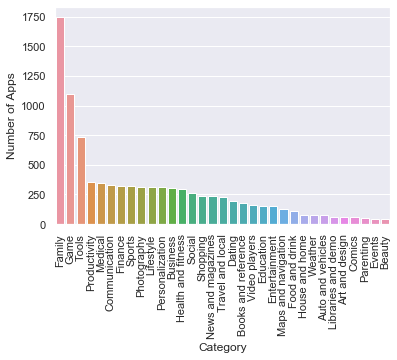

In [31]:
x = play.Category.value_counts()
sns.barplot(x = x.index, y = x)
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

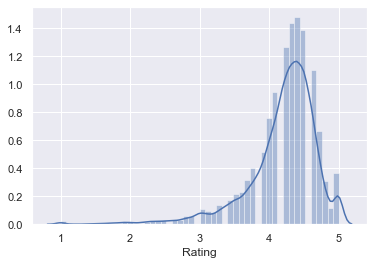

In [32]:
sns.distplot(a = play.Rating)
plt.show()   # Probability density of an app having a certain rating

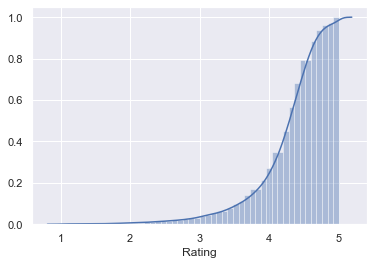

In [33]:
kwargs = {'cumulative': True}
sns.distplot(a = play.Rating, hist_kws=kwargs, kde_kws=kwargs)
plt.show()   # Cumulative density of an app having a certain rating. 
# approx. 80% of the data is between 0 and 4.5 ratings.

([<matplotlib.patches.Wedge at 0x1d0d65c9908>,
 [Text(-0.23628092608334275, -1.074323658852023, 'Free'),
  Text(0.23628087579062304, 1.0743236699131302, 'Paid')],
 [Text(-0.12888050513636876, -0.5859947230101943, '93.1%'),
  Text(0.12888047770397618, 0.5859947290435255, '6.9%')])

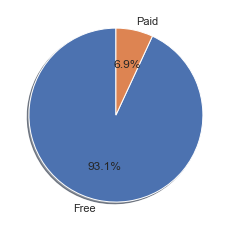

In [34]:
x = play.Type.value_counts()
plt.pie(x, labels = x.index, startangle = 90, 
        shadow = True, autopct='%1.1f%%')   # Vast majority of apps are free. 

Text(0, 0.5, 'Total Number of Installs per Category')

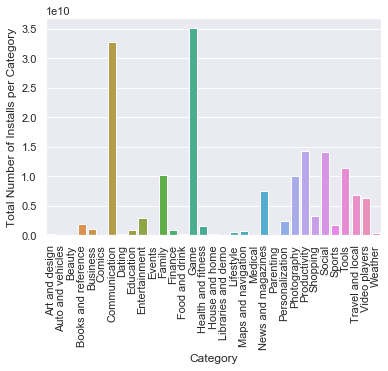

In [35]:
x = play.groupby("Category")["Installs (Value +)"].sum()
sns.barplot(x = x.index, y = x)
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("Total Number of Installs per Category")   #Games have an overwhelming majority here.

Text(0, 0.5, 'Average Price of App per Category')

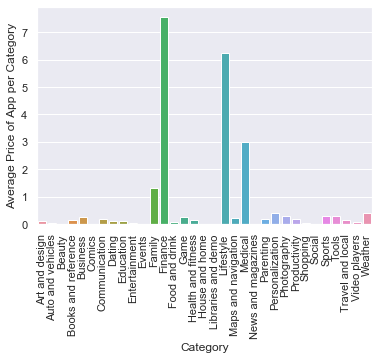

In [36]:
x = play.groupby("Category")["Price ($)"].mean()
sns.barplot(x = x.index, y = x)
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("Average Price of App per Category")  #Finance, Lifestyle and Medical apps are the most . . .
# . . . expensive

In [37]:
play[play["Price ($)"] >= 100.00]   # checking why finance and lifestyle are so high.

,Category,Rating,Reviews,Installs (Value +),Type,Price ($),Content Rating
App,,,,,,,
most expensive app (H),Family,4.3,6,100,Paid,399.99,Everyone
💎 I'm rich,Lifestyle,3.8,718,10000,Paid,399.99,Everyone
I'm Rich - Trump Edition,Lifestyle,3.6,275,10000,Paid,400.00,Everyone
I am rich,Lifestyle,3.8,3547,100000,Paid,399.99,Everyone
I am Rich Plus,Family,4.0,856,10000,Paid,399.99,Everyone
I am rich VIP,Lifestyle,3.8,411,10000,Paid,299.99,Everyone
I Am Rich Premium,Finance,4.1,1867,50000,Paid,399.99,Everyone
I am extremely Rich,Lifestyle,2.9,41,1000,Paid,379.99,Everyone
I am Rich!,Finance,3.8,93,1000,Paid,399.99,Everyone


### Logistic Regression

In [38]:
play.head()

,Category,Rating,Reviews,Installs (Value +),Type,Price ($),Content Rating
App,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.1,159,10000,Free,0.0,Everyone
Coloring book moana,Art and design,3.9,967,500000,Free,0.0,Everyone
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",Art and design,4.7,87510,5000000,Free,0.0,Everyone
Sketch - Draw & Paint,Art and design,4.5,215644,50000000,Free,0.0,Teen
Pixel Draw - Number Art Coloring Book,Art and design,4.3,967,100000,Free,0.0,Everyone


In [39]:
paid = play[play["Type"] == "Paid"]
paid.shape

(645, 7)

In [40]:
free = play[play["Type"] == "Free"]
free = free[0:645]
free.shape

(645, 7)

In [41]:
df = pd.concat([free, paid])
df     # dataframe with equal amount of paid to free apps

,Category,Rating,Reviews,Installs (Value +),Type,Price ($),Content Rating
App,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.1,159,10000,Free,0.00,Everyone
Coloring book moana,Art and design,3.9,967,500000,Free,0.00,Everyone
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",Art and design,4.7,87510,5000000,Free,0.00,Everyone
Sketch - Draw & Paint,Art and design,4.5,215644,50000000,Free,0.00,Teen
Pixel Draw - Number Art Coloring Book,Art and design,4.3,967,100000,Free,0.00,Everyone
...,...,...,...,...,...,...,...
FO Bixby,Personalization,5.0,5,100,Paid,0.99,Everyone
Mu.F.O.,Game,5.0,2,1,Paid,0.99,Everyone
Fast Tract Diet,Health and fitness,4.4,35,1000,Paid,7.99,Everyone


In [42]:
data = df[["Rating", "Type"]]
data.reset_index(inplace = True)
data = data.drop(columns = ["App"])

In [43]:
data["Type"] = data["Type"].map({"Free": 0, "Paid": 1})

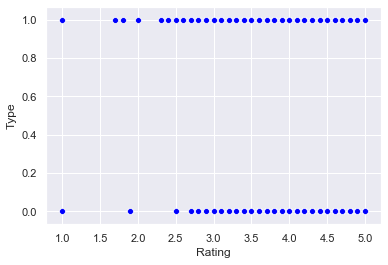

In [44]:
sns.scatterplot(data.Rating, data.Type, color = "blue")
#plt.xlim(3.0, 5.0)   # Graph doesnt show the data much
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data[["Rating"]], data["Type"], test_size = 0.1)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression()

In [49]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
model.predict(X_test)

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [51]:
X_test.head(10)

,Rating
1142,4.1
601,3.7
15,4.7
6,3.8
1245,4.3
100,3.9
825,3.3
8,4.4
741,4.7
274,4.5


In [52]:
model.score(X_test, y_test)   # a scale from 0 - 1 on the accuracy of the model.

0.5968992248062015

In [53]:
model.predict_proba(X_test)[0:10]  #probabilities that the predictions are accurate

array([[0.50858211, 0.49141789],
       [0.52755989, 0.47244011],
       [0.48008615, 0.51991385],
       [0.52282076, 0.47717924],
       [0.49908051, 0.50091949],
       [0.51807752, 0.48192248],
       [0.54645835, 0.45354165],
       [0.49432953, 0.50567047],
       [0.48008615, 0.51991385],
       [0.48957957, 0.51042043]])

In [54]:
model.predict([[4.9]])  # An app with a rating of 4.9 is more likely to be a paid app

array([1], dtype=int64)

### Linear Regression

In [55]:
df.head()

,Category,Rating,Reviews,Installs (Value +),Type,Price ($),Content Rating
App,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.1,159,10000,Free,0.0,Everyone
Coloring book moana,Art and design,3.9,967,500000,Free,0.0,Everyone
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",Art and design,4.7,87510,5000000,Free,0.0,Everyone
Sketch - Draw & Paint,Art and design,4.5,215644,50000000,Free,0.0,Teen
Pixel Draw - Number Art Coloring Book,Art and design,4.3,967,100000,Free,0.0,Everyone


In [56]:
y = df["Reviews"]
x1 = df["Installs (Value +)"]

In [57]:
import statsmodels.api as sm

In [58]:
x = sm.add_constant(x1)
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Reviews   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     1056.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):          1.16e-169
Time:                        13:47:32   Log-Likelihood:                -20975.
No. Observations:                1290   AIC:                         4.195e+04
Df Residuals:                    1288   BIC:                         4.196e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.973e+04   7.88e+04      0.377      0.706   -1.25e+05    1.84e+05
Installs (Value +)     0.0221      0.001     32.495      0.000       0.021       0.023
==============================================================================
Omnibus:                     1968.071   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1570034.592
Skew:                           8.767   Prob(JB):                         0.00
Kurtosis:                     173.007   Cond. No.                     1.18e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

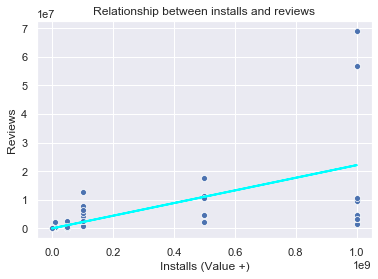

In [59]:
sns.scatterplot(x1, y)
yhat = 0.0221 * x1 + 297.3
fig = plt.plot(x1, yhat, lw = 2, c = "cyan", label = "Regression Line")
plt.title("Relationship between installs and reviews")
plt.show()

In [60]:
compare = pd.DataFrame({"const": 1, "Installs (Value +)": [453218, 859453, 6566542, 55954567]})
compare

,const,Installs (Value +)
0,1,453218
1,1,859453
2,1,6566542
3,1,55954567


In [61]:
compare.rename(index = {0: "Pyramid Run", 1: "Happy Birds", 2: "Flappy Frogs", 3: "Wheresapp"}, 
               inplace = True)
compare

,const,Installs (Value +)
Pyramid Run,1,453218
Happy Birds,1,859453
Flappy Frogs,1,6566542
Wheresapp,1,55954567


In [62]:
predictions = result.predict(compare)
predictions   # Number of reviews expected for these apps.

Pyramid Run     3.973628e+04
Happy Birds     4.870330e+04
Flappy Frogs    1.746787e+05
Wheresapp       1.264845e+06
dtype: float64

In [63]:
predict_df = pd.DataFrame({"Predicted Number of Reviews": predictions})
joined_df = compare.join(predict_df)
joined_df.rename(index = {0: "Pyramid Run", 1: "Happy Birds", 2: "Flappy Frogs", 3: "Wheresapp"})
joined_df.round(0)

,const,Installs (Value +),Predicted Number of Reviews
Pyramid Run,1,453218,39736.0
Happy Birds,1,859453,48703.0
Flappy Frogs,1,6566542,174679.0
Wheresapp,1,55954567,1264845.0
